In [2]:
#### https://www.datacamp.com/community/tutorials/machine-learning-python#gs.1iT7reQ

import pandas as pd

digits = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tra", header=None)


print(digits)

      0   1   2   3   4   5   6   7   8   9  ...  55  56  57  58  59  60  61  \
0      0   1   6  15  12   1   0   0   0   7 ...   0   0   0   6  14   7   1   
1      0   0  10  16   6   0   0   0   0   7 ...   0   0   0  10  16  15   3   
2      0   0   8  15  16  13   0   0   0   1 ...   0   0   0   9  14   0   0   
3      0   0   0   3  11  16   0   0   0   0 ...   0   0   0   0   1  15   2   
4      0   0   5  14   4   0   0   0   0   0 ...   0   0   0   4  12  14   7   
5      0   0  11  16  10   1   0   0   0   4 ...   3   0   0  10  16  16  16   
6      0   0   1  11  13  11   7   0   0   0 ...   0   0   0   1  13   5   0   
7      0   0   8  10   8   7   2   0   0   1 ...   0   0   0   4  13   8   0   
8      0   0  15   2  14  13   2   0   0   0 ...   0   0   0  10  12   5   0   
9      0   0   3  13  13   2   0   0   0   6 ...   0   0   0   3  15  11   6   
10     0   0   6  14  14  16  16   8   0   0 ...   0   0   0  10  12   0   0   
11     0   0   0   3  16  11   1   0   0

In [3]:
from sklearn import datasets

digits = datasets.load_digits()

print(digits)

{'images': array([[[  0.,   0.,   5., ...,   1.,   0.,   0.],
        [  0.,   0.,  13., ...,  15.,   5.,   0.],
        [  0.,   3.,  15., ...,  11.,   8.,   0.],
        ..., 
        [  0.,   4.,  11., ...,  12.,   7.,   0.],
        [  0.,   2.,  14., ...,  12.,   0.,   0.],
        [  0.,   0.,   6., ...,   0.,   0.,   0.]],

       [[  0.,   0.,   0., ...,   5.,   0.,   0.],
        [  0.,   0.,   0., ...,   9.,   0.,   0.],
        [  0.,   0.,   3., ...,   6.,   0.,   0.],
        ..., 
        [  0.,   0.,   1., ...,   6.,   0.,   0.],
        [  0.,   0.,   1., ...,   6.,   0.,   0.],
        [  0.,   0.,   0., ...,  10.,   0.,   0.]],

       [[  0.,   0.,   0., ...,  12.,   0.,   0.],
        [  0.,   0.,   3., ...,  14.,   0.,   0.],
        [  0.,   0.,   8., ...,  16.,   0.,   0.],
        ..., 
        [  0.,   9.,  16., ...,   0.,   0.,   0.],
        [  0.,   3.,  13., ...,  11.,   5.,   0.],
        [  0.,   0.,   0., ...,  16.,   9.,   0.]],

       ..., 
       [[ 

In [5]:
print(digits.keys())

dict_keys(['images', 'data', 'DESCR', 'target', 'target_names'])


In [6]:
print(digits.target_names)
print(digits.target)


[0 1 2 3 4 5 6 7 8 9]
[0 1 2 ..., 8 9 8]


In [7]:
print(digits.DESCR)

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

In [8]:
digits_data = digits.data
digits_target = digits.target
digits_images = digits.images

print(digits_data.shape)
print(digits_target.shape)
print(digits_images.shape)



(1797, 64)
(1797,)
(1797, 8, 8)


In [12]:
#Let's check if digits_data is a reshaped version of the data_image
import numpy as np
print(np.all(digits.images.reshape(1797,64)==digits.data)) 

True


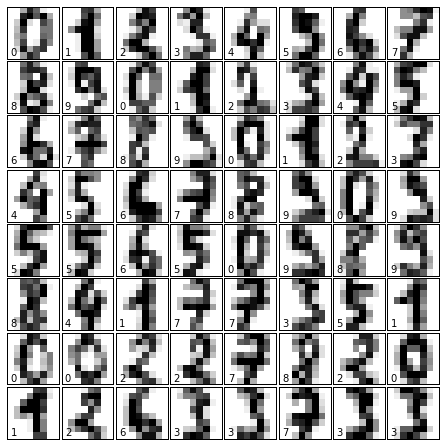

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline


fig = plt.figure(figsize = (6,6))
fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05,wspace = 0.05 )


#for each of the 64 images
for i in range(64):
    #initialize the subplots: add an 8 by 8 grid at the ith position
    ax = fig.add_subplot(8,8,i+1, xticks = [], yticks = [])
    #display image at the ith position
    ax.imshow(digits.images[i], cmap = plt.cm.binary, interpolation = 'nearest')
    #digits.images[i] is an 8by 8 image taht is plotted on ax subplot,repeat this for 64 times
    ax.text(0,7, str(digits.target[i]))

plt.show()






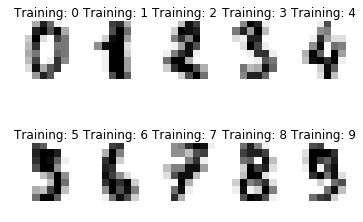

In [13]:
#we can also visualize tha targets

images_and_labels = list(zip(digits.images,digits.target))
for index, (image, label) in enumerate(images_and_labels[:10]):
    #initialize a 2 by 4 subplot on the i+1th position
    plt.subplot(2,5,index + 1)
    plt.axis('off')
    plt.imshow(image, cmap = plt.cm.gray_r, interpolation = 'nearest')
    plt.title('Training: ' + str(label))
    
    
plt.show()

In [14]:
images_and_labels[100]
print()

In [15]:
print(digits.images[0:1:1])
print(digits.data[0:1:1])


[[[  0.   0.   5.  13.   9.   1.   0.   0.]
  [  0.   0.  13.  15.  10.  15.   5.   0.]
  [  0.   3.  15.   2.   0.  11.   8.   0.]
  [  0.   4.  12.   0.   0.   8.   8.   0.]
  [  0.   5.   8.   0.   0.   9.   8.   0.]
  [  0.   4.  11.   0.   1.  12.   7.   0.]
  [  0.   2.  14.   5.  10.  12.   0.   0.]
  [  0.   0.   6.  13.  10.   0.   0.   0.]]]
[[  0.   0.   5.  13.   9.   1.   0.   0.   0.   0.  13.  15.  10.  15.
    5.   0.   0.   3.  15.   2.   0.  11.   8.   0.   0.   4.  12.   0.
    0.   8.   8.   0.   0.   5.   8.   0.   0.   9.   8.   0.   0.   4.
   11.   0.   1.  12.   7.   0.   0.   2.  14.   5.  10.  12.   0.   0.
    0.   0.   6.  13.  10.   0.   0.   0.]]


In [17]:
from sklearn.decomposition import RandomizedPCA
from sklearn.decomposition import PCA


#Let's try some dimensionality reduction with PCA
#random PCA that tkes two components
randomized_pca = RandomizedPCA(n_components = 2) #Principal components

#fit and transform the data into the PCA Model

reduced_data_rpca = randomized_pca.fit_transform(digits.data)

#create regular PCA Model, not randomized

pca = PCA(n_components = 2)
reduced_data_pca = pca.fit_transform(digits.data)




In [18]:
print(reduced_data_rpca)
print(reduced_data_pca)

[[ -1.25977351  21.27460287]
 [  7.95832692 -20.76951658]
 [  6.99299345  -9.95810686]
 ..., 
 [ 10.79958761  -6.95768096]
 [ -4.87234017  12.42800099]
 [ -0.34694216   6.37024561]]
[[  1.25946645 -21.27488348]
 [ -7.9576113   20.76869896]
 [ -6.99192297   9.95598641]
 ..., 
 [-10.8012837    6.96025223]
 [  4.87210009 -12.42395362]
 [  0.34438963  -6.36554919]]


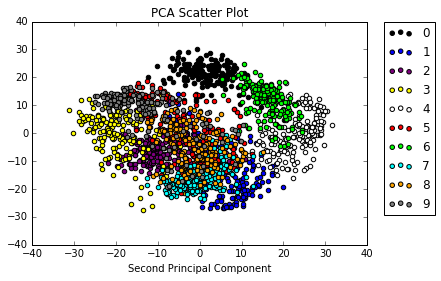

In [19]:
colors = ['black', 'blue', 'purple', 'yellow', 'white', 'red', 'lime', 'cyan', 'orange', 'gray']
#len(colors)
for i in range(len(colors)):
    x = reduced_data_rpca[:,0][digits.target == i] #x is an array get all first item i.e index 0 wjere the digit target is i
    #[:,0] means everyrows and 0th emelemnt i.e. first
    
    y = reduced_data_rpca[:,1][digits.target == i]
    plt.scatter(x,y, c=colors[i])
#for every target variable plot a scatter plot usng reduced by pca    

plt.legend(digits.target_names, bbox_to_anchor=(1.05,1), loc = 2, borderaxespad = 0.)
plt.xlabel('First Principal Component')
plt.xlabel('Second Principal Component')
plt.title("PCA Scatter Plot")
plt.show()


In [20]:
#pca reveals clusters of the digits using 1st and 2nd Principal componnt 
#The problem now reduces to clustering
#Let's preprocess Data

#Normalize data
from sklearn.preprocessing import scale


#Standardiziation was used
data = scale(digits.data)



In [21]:
data

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ..., 
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [22]:
#Now split the data into test nd training
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test, images_train, images_test = train_test_split(data, digits.target, digits.images,
                                                                              test_size = 0.25, random_state = 42)

#train_test_split splits the data into two, the arrays are defined,
#Note that the target variable digits.target is not attached in the data

#Also the digits.images is not scaled here 
X_train
y_train


array([5, 2, 0, ..., 2, 7, 1])

In [23]:
#help(train_test_split)

n_samples, n_features = X_train.shape

print(n_samples)
print(n_features)

# Number of training labels

n_digits = len(np.unique(y_train)) #counts unique classes

print(n_digits)
len(y_test)

1347
64
10


450

In [24]:
##build the  k means classifier

from sklearn import cluster

clf = cluster.KMeans(init = 'k-means++', n_clusters = 10, random_state = 42)

clf.fit(X_train) #predict the clusters

print(clf)


KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=10, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=42, tol=0.0001,
    verbose=0)


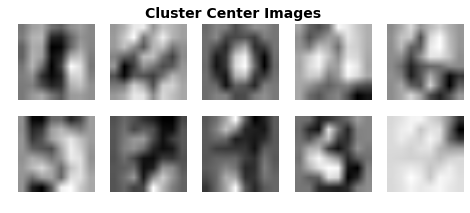

In [25]:
#Visualize the center of clusters
#the generated center of clusters is actualy a point in the data space hence, it is an image as well

fig = plt.figure(figsize = (8,3))
fig.suptitle('Cluster Center Images', fontsize = 14, fontweight = 'bold')

for i in range(10):
    
    ax = fig.add_subplot(2,5,1+i) #add_subplot(x,y,position)
    ax.imshow(clf.cluster_centers_[i].reshape((8,8)), cmap = plt.cm.binary)
    
    #clf has cluster_centers_ data, study on the outpuls of cluster.KMeans
    plt.axis('off')
    
    
plt.show()
    



In [26]:
#Now we predict the labels of the test set

y_pred = clf.predict(X_test)  #how come the output of calling predict maps to the labels?

print(y_pred[:100])

print(y_test[:100])

clf.cluster_centers_.shape





[4 8 8 9 3 3 5 8 5 3 0 7 1 2 1 3 8 6 8 8 1 5 8 6 5 4 8 5 4 8 1 8 3 1 1 4 8
 1 6 4 4 8 0 8 4 7 8 2 4 5 5 0 8 5 4 2 8 2 2 7 2 1 5 3 1 5 6 2 6 8 8 8 8 6
 6 2 1 5 8 8 8 2 3 8 8 2 4 1 1 8 0 3 7 8 8 3 8 2 1 1]
[6 9 3 7 2 1 5 2 5 2 1 9 4 0 4 2 3 7 8 8 4 3 9 7 5 6 3 5 6 3 4 9 1 4 4 6 9
 4 7 6 6 9 1 3 6 1 3 0 6 5 5 1 9 5 6 0 9 0 0 1 0 4 5 2 4 5 7 0 7 5 9 5 5 4
 7 0 4 5 5 9 9 0 2 3 8 0 6 4 4 9 1 2 8 3 5 2 9 0 4 4]


(10, 64)

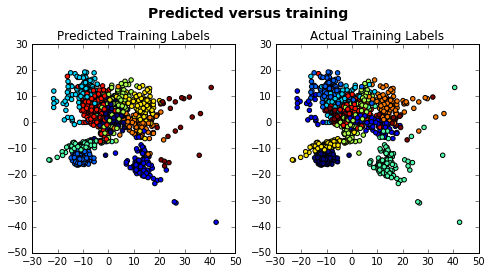

In [29]:
# now let's visualize the predicted labels

from sklearn.manifold import Isomap

#create an isomap and fit the 'digits' data to it
X_iso = Isomap(n_neighbors = 10).fit_transform(X_train)

#Compute cluter centers and predict cluster index for each sample
clusters = clf.fit_predict(X_train)

#create a plot with subplots in a grid of 1 by 2
fig, ax = plt.subplots(1,2,figsize = (8,4))

#layoutng
fig.suptitle('Predicted versus training', fontsize =14, fontweight = 'bold')
fig.subplots_adjust(top=0.85)


#now scatterplot on every axis
#Note that the ax is defined as a 1 by 2 plot

ax[0].scatter(X_iso[:,0], X_iso[:,1], c=clusters)
ax[0].set_title('Predicted Training Labels')

ax[1].scatter(X_iso[:,0], X_iso[:,1], c=y_train)
ax[1].set_title('Actual Training Labels')





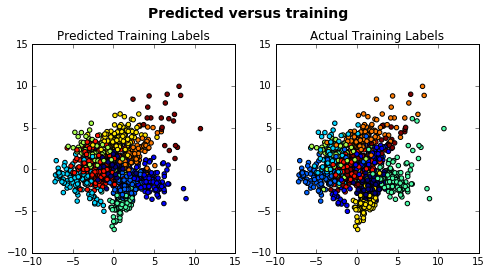

In [30]:
##Visualize using PCA Method

from sklearn.decomposition import PCA

X_pca = PCA(n_components = 2).fit_transform(X_train)

#Compute cluter centers and predict cluster index for each sample
clusters = clf.fit_predict(X_train)

#create a plot with subplots in a grid of 1 by 2
fig, ax = plt.subplots(1,2,figsize = (8,4))

#layoutng
fig.suptitle('Predicted versus training', fontsize =14, fontweight = 'bold')
fig.subplots_adjust(top=0.85)


#now scatterplot on every axis
#Note that the ax is defined as a 1 by 2 plot

ax[0].scatter(X_pca[:,0], X_pca[:,1], c=clusters)
ax[0].set_title('Predicted Training Labels')

ax[1].scatter(X_pca[:,0], X_pca[:,1], c=y_train)
ax[1].set_title('Actual Training Labels')


In [31]:
#Model Accuracy

from sklearn import metrics

print(metrics.confusion_matrix(y_test, y_pred))

[[ 0  0 43  0  0  0  0  0  0  0]
 [20  0  0  7  0  0  0 10  0  0]
 [ 5  0  0 31  0  0  0  1  1  0]
 [ 1  0  0  1  0  1  4  0 39  0]
 [ 1 50  0  0  0  0  1  2  0  1]
 [ 1  0  0  0  1 41  0  0 16  0]
 [ 0  0  1  0 44  0  0  0  0  0]
 [ 0  0  0  0  0  1 34  1  0  5]
 [21  0  0  0  0  3  1  2 11  0]
 [ 0  0  0  0  0  2  3  3 40  0]]
